# 다층 퍼셉트론을 들어가기전에...

# AND, OR, NAND, XOR 그래프를 2차원으로 그려보자
o 마크의 출력 값은 1
x 마크의 출력 값은 0

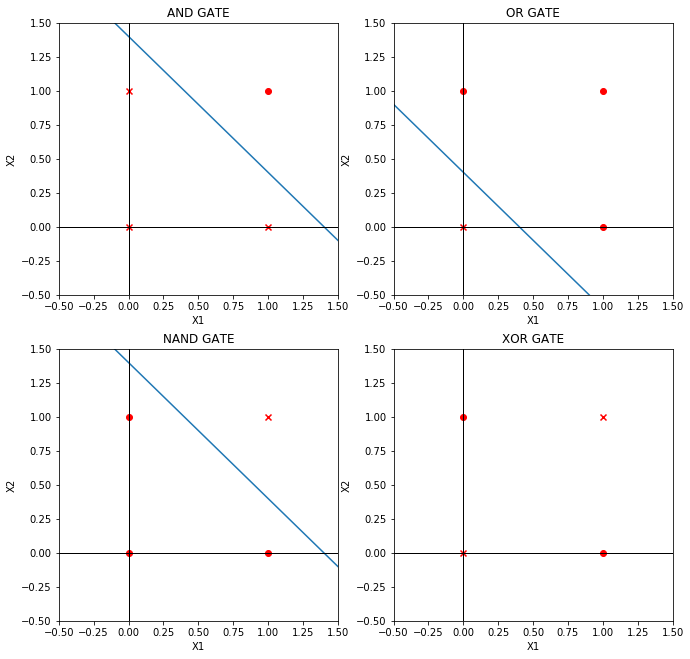

In [58]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,11))#그림 생성
ax1 = fig.add_subplot(221)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')

X1 = np.arange(-0.5, 2.0, 0.01)
X2 = np.arange(-0.5, 2.0, 0.01)

'''
AND 게이트 시작
'''
w1, w2, theta = 0.5, 0.5, 0.7 #AND 의 초기값
b = -theta# 임계값을 -b로 치환함.
#0 = b + (w1*x1) + (w2*x2)를 변형하면, X2 =  -(w1 * X1 +b) /w2
ax1.plot(X1,-(w1 * X1 +b) / w2)#경계선 그리기

ax1.set_xlim([-0.5, 1.5])
ax1.set_ylim([-0.5, 1.5])

ax1.axvline(x=0, color='black', linewidth=1)#x=0 기준점
ax1.axhline(y=0, color='black', linewidth=1)#y=0기준점

ax1.scatter(0, 0, c='r', marker='x')#계단 함수 적용전
ax1.scatter(0, 1, c='r', marker='x')#계단 함수 적용전
ax1.scatter(1, 0, c='r', marker='x')#계단 함수 적용전
ax1.scatter(1, 1, c='r', marker='o')#계단 함수 적용전
ax1.title.set_text('AND GATE')

'''
OR 게이트 시작
'''
w1, w2, theta = 0.5, 0.5, 0.2 #OR 게이트 초기값
b = -theta# 임계값을 -b로 치환함.

ax2 = fig.add_subplot(222)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.plot(X1,-(w1 * X1 +b) / w2)

ax2.set_xlim([-0.5, 1.5])
ax2.set_ylim([-0.5, 1.5])

ax2.axvline(x=0, color='black', linewidth=1)
ax2.axhline(y=0, color='black', linewidth=1)

ax2.scatter(0, 0, c='r', marker='x')#계단 함수 적용전
ax2.scatter(0, 1, c='r', marker='o')#계단 함수 적용전
ax2.scatter(1, 0, c='r', marker='o')#계단 함수 적용전
ax2.scatter(1, 1, c='r', marker='o')#계단 함수 적용전
ax2.title.set_text('OR GATE')

'''
NAND 게이트 시작
'''
w1, w2, theta = -0.5, -0.5, -0.7 #NAND 의 초기값
b = -theta# 임계값을 -b로 치환함.

ax3 = fig.add_subplot(223)
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.plot(X1,-(w1 * X1 +b) / w2)

ax3.set_xlim([-0.5, 1.5])
ax3.set_ylim([-0.5, 1.5])

ax3.axvline(x=0, color='black', linewidth=1)
ax3.axhline(y=0, color='black', linewidth=1)

ax3.scatter(0, 0, c='r', marker='o')#계단 함수 적용전
ax3.scatter(0, 1, c='r', marker='o')#계단 함수 적용전
ax3.scatter(1, 0, c='r', marker='o')#계단 함수 적용전
ax3.scatter(1, 1, c='r', marker='x')#계단 함수 적용전
ax3.title.set_text('NAND GATE')

'''
XOR 게이트 시작
'''
ax4 = fig.add_subplot(224)
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')

ax4.set_xlim([-0.5, 1.5])
ax4.set_ylim([-0.5, 1.5])

ax4.axvline(x=0, color='black', linewidth=1)
ax4.axhline(y=0, color='black', linewidth=1)

ax4.scatter(0, 0, c='r', marker='x')#계단 함수 적용전
ax4.scatter(0, 1, c='r', marker='o')#계단 함수 적용전
ax4.scatter(1, 0, c='r', marker='o')#계단 함수 적용전
ax4.scatter(1, 1, c='r', marker='x')#계단 함수 적용전
ax4.title.set_text('XOR GATE')
plt.show()

# 다층 퍼셉트론

# 1.XOR 게이트

In [6]:
from pandas import DataFrame
import numpy as np

In [7]:
x1 = [0,0,1,1] # 1 번째 인풋 값
x2 = [0,1,0,1] # 2 번째 인풋 값

In [8]:
xor_data = {'x1': [0, 0, 1, 1]
           ,'x2': [0, 1, 0, 1]
           ,'y': [0, 1, 1, 0]}

In [9]:
df_xor = DataFrame(xor_data)

In [10]:
df_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# 2. 파이썬으로 XOR 게이트 만들기

xor 게이트를 만들기 위해서는 선형으로는 불가능 하다.

NAND, OR, AND 게이트를 쌓아서 XOR 게이트를 만들 수 있다.

In [11]:
def and_gate_bais(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 #가중치(W)는 다양한 값이 나올 수 있음.(0.5, 0.5, 0.8) 등등
    b = -theta# 임계값을 -b로 치환함.
    sigma = b + (w1*x1) + (w2*x2)
    if sigma <= 0:
        return 0
    elif sigma > 0:
        return 1

In [12]:
def nand_gate_bais(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7 #가중치(W)는 다양한 값이 나올 수 있음.
    b = -theta# 임계값을 -b로 치환함.
    sigma = b + (w1*x1) + (w2*x2)
    if sigma <= 0:
        return 0
    elif sigma > 0:
        return 1

In [34]:
def or_gate_bais(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2 #가중치(W)는 다양한 값이 나올 수 있음.
    b = -theta# 임계값을 -b로 치환함.
    sigma = b + (w1*x1) + (w2*x2)
    if sigma <= 0:
        return 0
    elif sigma > 0:
        return 1

In [14]:
def XOR(x1, x2):
    y = and_gate_bais(nand_gate_bais(x1, x2), or_gate_bais(x1, x2))
    return y

In [15]:
print(XOR(0,0))#예상 값 0 
print(XOR(1,0))#예상 값 1
print(XOR(0,1))#예상 값 1
print(XOR(1,1))#예상 값 0

0
1
1
0


# 3. XOR 게이트 시각화

In [52]:
# Axes3D 객체를 생성 후 3차원 그래프를 그리는 멤버함수 호출방식
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def show_and_perceptron():# NAND 는 부호를 전부 뒤집으면 된다. -0.5, -0.5, 0.7
    fig = plt.figure(figsize=(15,13))#그림 생성
    ax = fig.add_subplot(111, projection='3d') 
    #fig.set_size_inches(6, 6, 6)# 크기 셋팅
    X1 = np.arange(0.0, 1.0, 0.01) 
    X2 = np.arange(0.0, 1.0, 0.01) 
    X1, X2 = np.meshgrid(X1, X2)
    
    
    w1, w2, b = -0.5, -0.5, 0.7
    Z = b + X1*w1 + X2*w2
    ax.plot_surface(X1, X2, Z,  color='w',linewidth=1) #NAND Gate
    
    w1, w2, b = 0.5, 0.5, -0.2
    Z = b + X1*w1 + X2*w2 
    ax.plot_surface(X1, X2, Z, color='w',alpha=0.7, linewidth=1) #OR Gate
    
    # Y가 0일때. b + W1X1 + W2X2 = 0
    ax.plot_surface(X1, X2, np.zeros([1,1]), color='w',alpha=0.7, linewidth=1)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    
    ax.scatter(0, 0, XOR(0,0), c='r', marker='x')
    ax.scatter(0, 1, XOR(0,1), c='r', marker='o')
    ax.scatter(1, 0, XOR(1,0), c='r', marker='o')
    ax.scatter(1, 1, XOR(1,1), c='r', marker='x')

    ax.invert_xaxis()
    plt.show()

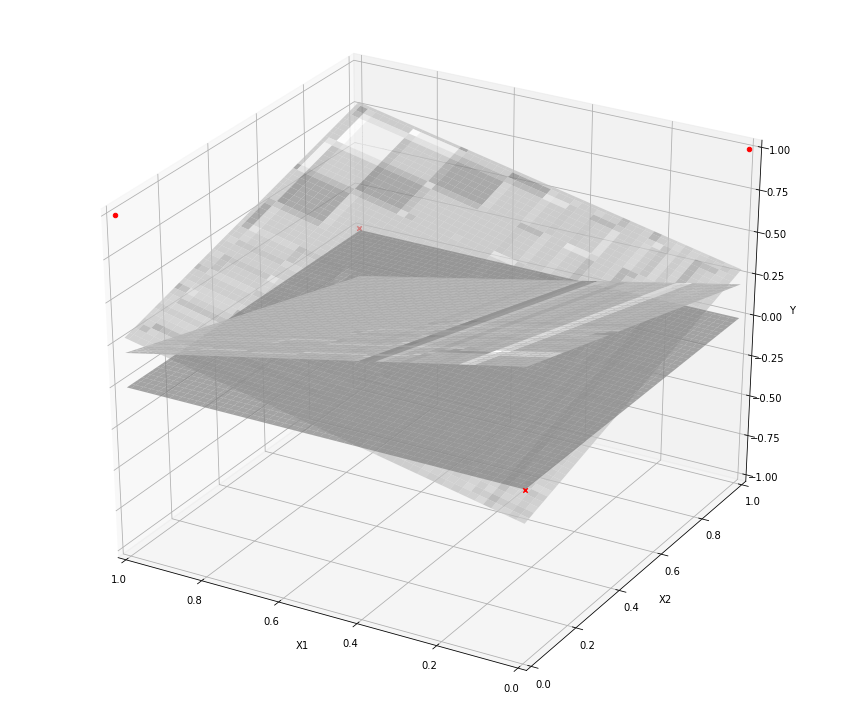

In [54]:
show_and_perceptron()

In [59]:
XOR(x1, x2)

TypeError: can't multiply sequence by non-int of type 'float'

In [55]:
# Axes3D 객체를 생성 후 3차원 그래프를 그리는 멤버함수 호출방식
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def show_and_perceptron():# NAND 는 부호를 전부 뒤집으면 된다. -0.5, -0.5, 0.7
    fig = plt.figure(figsize=(15,13))#그림 생성
    ax = fig.add_subplot(111, projection='3d') 
    #fig.set_size_inches(6, 6, 6)# 크기 셋팅
    X1 = np.arange(0.0, 1.0, 0.01) 
    X2 = np.arange(0.0, 1.0, 0.01) 
    X1, X2 = np.meshgrid(X1, X2)
    
    
    w1, w2, b = -0.5, -0.5, 0.7
    Z = b + X1*w1 + X2*w2
    XOR(x1, x2)
    ax.plot_surface(X1, X2, Z,  color='w',linewidth=1) #NAND Gate
    
    w1, w2, b = 0.5, 0.5, -0.2
    Z = b + X1*w1 + X2*w2 
    ax.plot_surface(X1, X2, Z, color='w',alpha=0.7, linewidth=1) #OR Gate
    
    # Y가 0일때. b + W1X1 + W2X2 = 0
    ax.plot_surface(X1, X2, np.zeros([1,1]), color='w',alpha=0.7, linewidth=1)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    for i in XOR(0,0)
    ax.scatter(0, 0, XOR(0,0), c='r', marker='x')


    ax.invert_xaxis()
    plt.show()